# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
#Visualización (el mantra)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

In [3]:
student_data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

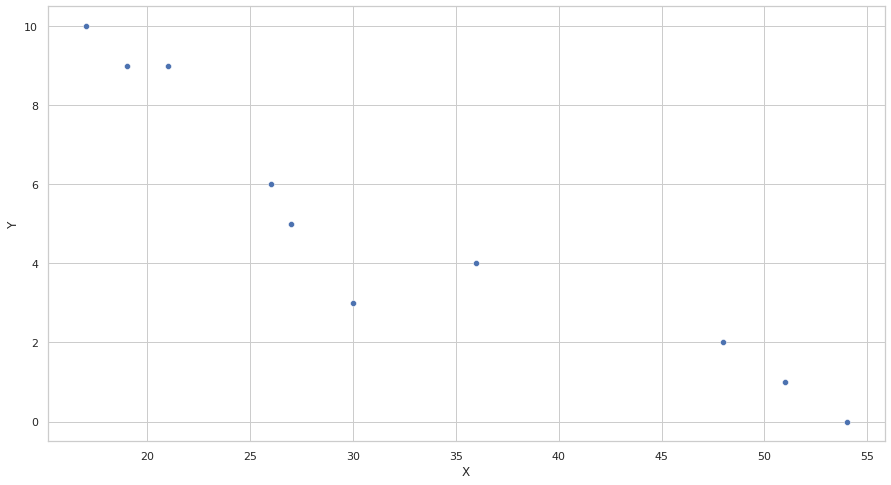

In [4]:
sns.scatterplot(x=student_data["X"], y=student_data["Y"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

###### Of course, it is possible to see a quite linear relationship between both parameters.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
std_cov = np.cov(student_data['X'],student_data['Y'])
std_corr = student_data.corr()
print(std_cov)
print(std_corr)

[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]
          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


###### So, the covariance indicates the direction of the relationship between the variables. It shows that they are strongly negative related, so that one decreases as the other increases. Besides it shows that the increment between the 'X' values is higher, which means that its slope is steeper.

###### The correlation indicates both the direction and the strength, as well as being normalised between -1 and 1. As correlation is very close to -1, it shows that truly both variables have a strong negative relationship. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
lr = LinearRegression()
lr.fit(
    X = student_data[["X"]],
    y = student_data.Y
)
beta_1 = lr.coef_
beta_0 = lr.intercept_

In [7]:
student_data["Pre"] = (student_data.X * lr.coef_) + lr.intercept_

In [8]:
student_data.head()

,X,Y,Pre
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256


###### I am using linear regression. My outcomes are the estimated values that 'y' will receive, for its corresponding value of 'x'. For reaching this point it was necessary to estimate the values of the slope and the intercept.

Plot your regression model on your scatter plot.

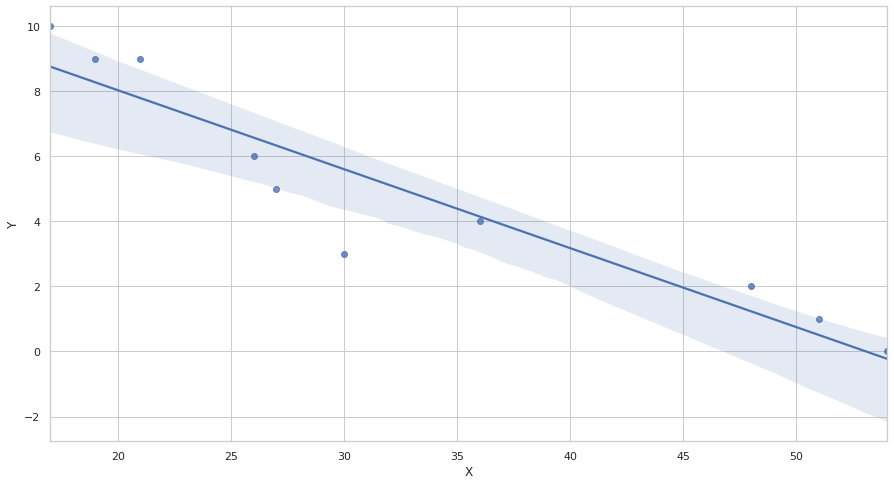

In [9]:
sns.regplot(x=student_data["X"], y=student_data["Y"], data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
student_data["mean"] = student_data.Y.mean()

In [11]:
std_data_TSS = ((student_data['Y'] - student_data['mean']) ** 2).sum()

In [12]:
std_data_TSS # The total squared sum is not very high, so preliminarly the model is not bad

112.9

In [13]:
std_data_RSS = ((student_data['Y'] - student_data["Pre"]) ** 2).sum()

In [14]:
std_data_RSS # This parameter is neither high, which is good

13.319201847356268

In [15]:
r2 = 1 - (std_data_RSS/std_data_TSS)

In [58]:
r2 # As R^2 is very close to 1, the model is therefore of a very good quality

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [16]:
df = pd.read_csv('vehicles.csv') 

In [17]:
df.rename(columns={'Fuel Barrels/Year':'BarrelsYear', 'Combined MPG':'MPG','CO2 Emission Grams/Mile':'CO2','Fuel Cost/Year':'FuelCost'}, inplace=True)

In [18]:
df.drop(['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG', 'Highway MPG'], axis=1, inplace=True)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
df.corr()

,Year,Cylinders,BarrelsYear,MPG,CO2,FuelCost
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
BarrelsYear,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
FuelCost,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


###### Well the parameter with the highest impact is the number of  'Fuel Barrels/Year', with a very high correlation, but followed closely by many of the other parameters. The least relevant variable is the year. This may make sense as even having a diesel sportscar made in the year 2021 it would polute more than a gasoline one made 10 years ago. Following this line, parameters as the engine or the cylinders have much higher weight.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
results = smf.ols("CO2 ~ Year * Cylinders * BarrelsYear * MPG * FuelCost", data = df).fit() # This is a multivariant model

In [21]:
results.summary() 
# Shows the relation between the parameter we want to evaluate and the other variables, to see how they affect it.
# When multiplying all the factors, the R-squared is much bigger than when only trying adding.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.406e+05
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:11:10   Log-Likelihood:            -1.2121e+05
No. Observations:               35952   AIC:                         2.425e+05
Df Residuals:                   35921   BIC:                         2.428e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -4.786e+04   3244.389    -14.752      0.000   -5.42e+04   -4.15e+04
Year                                       24.1647      1.618     14.936      0.000      20.993      27.336
Cylinders                                7563.0125    589.432     12.831      0.000    6407.708    8718.317
Year:Cylinders                             -3.8099      0.294    -12.950      0.000      -4.386      -3.233
BarrelsYear                              1862.8545     92.995     20.032      0.000    1680.582    2045.127
Year:BarrelsYear                           -0.9215      0.046    -19.850      0.000      -1.012      -0.830
Cylinders:BarrelsYear                    -276.4608     13.899    -19.890      0.000    -303.704    -249.218
Year:Cylinders:BarrelsYear                  0.1380      0.007     19.882      0.000       0.124       0.152
MPG                                       197.6173     29.458      6.708      0.000     139.878     255.357
Year:MPG                                   -0.0993      0.015     -6.733      0.000      -0.128      -0.070
Cylinders:MPG                             -39.4443      7.484     -5.270      0.000     -54.114     -24.775
Year:Cylinders:MPG                          0.0197      0.004      5.269      0.000       0.012       0.027
BarrelsYear:MPG                            42.6883      8.518      5.011      0.000      25.992      59.384
Year:BarrelsYear:MPG                       -0.0220      0.004     -5.182      0.000      -0.030      -0.014
Cylinders:BarrelsYear:MPG                  -6.2065      1.511     -4.109      0.000      -9.167      -3.246
Year:Cylinders:BarrelsYear:MPG              0.0032      0.001      4.283      0.000       0.002       0.005
FuelCost                                   38.0231      2.079     18.290      0.000      33.948      42.098
Year:FuelCost                              -0.0191      0.001    -18.459      0.000      -0.021      -0.017
Cylinders:FuelCost                         -6.7490      0.307    -22.017      0.000      -7.350      -6.148
Year:Cylinders:FuelCost                     0.0034      0.000     22.278      0.000       0.003       0.004
BarrelsYear:FuelCost                        0.0995      0.017      5.964      0.000       0.067       0.132
Year:BarrelsYear:FuelCost               -4.914e-05   8.34e-06     -5.892      0.000   -6.55e-05   -3.28e-05
Cylinders:BarrelsYear:FuelCost             -0.0034      0.002     -1.614      0.107      -0.008       0.001
Year:Cylinders:BarrelsYear:FuelCost      1.646e-06   1.07e-06      1.540      0.124    -4.5e-07    3.74e-06
MPG:FuelCost                                0.7868      0.051     15.569      0.000       0.688       0.886
Year:MPG:FuelCost                          -0.0004   2.52e-

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

###### So, checking principaly the values of 'coef' and P>(t), it shows that the Cylinders is the most affected variable by the variations of the analysed parameter. As for the P(t), it's also true that the parameters combination that include the variable 'year' are the less aligned.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

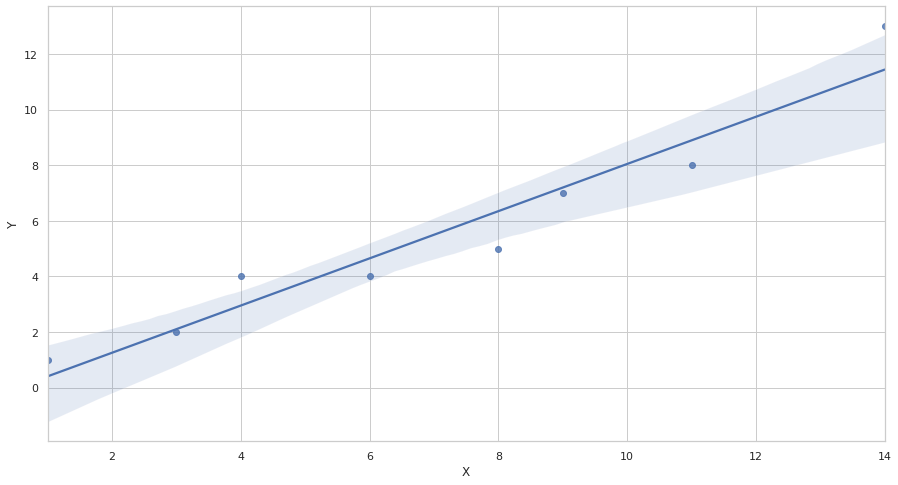

In [23]:
sns.regplot(x=data["X"], y=data["Y"], data=data);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [30]:
lr = LinearRegression()
lr.fit(
    X = data[["X"]],
    y = data.Y
)
beta_1 = lr.coef_
beta_0 = lr.intercept_
data["Pre"] = (data.X * lr.coef_) + lr.intercept_
data.head(10)

,X,Y,Pre
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


In [32]:
data['Diff'] = abs(data['Y'] - data['Pre'])
data['Diff'].head(10)
# The model shows that as more people is invited less people is actually comming. However it not follows a perfect 
# linear relationship because there are at least three outliers.

0    0.590909
1    0.106061
2    1.045455
3    0.651515
4    1.348485
5    0.196970
6    0.893939
7    1.560606
Name: Diff, dtype: float64

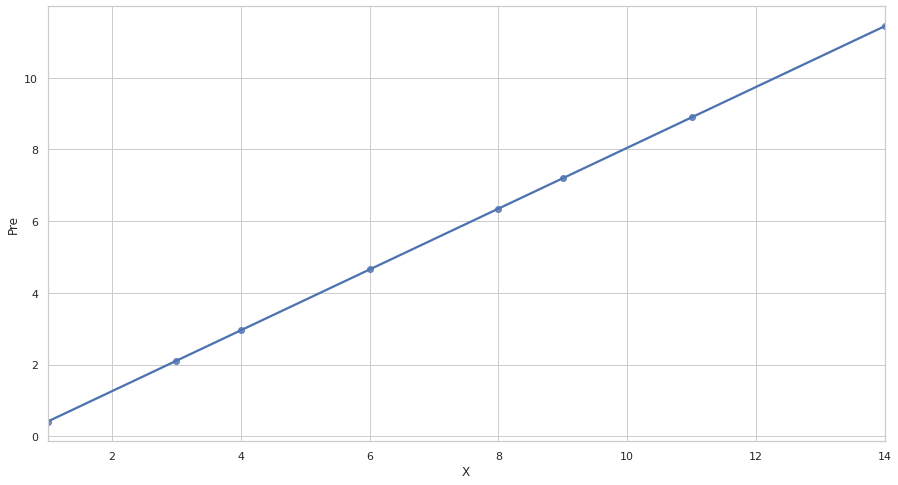

In [33]:
sns.regplot(x=data["X"], y=data["Pre"], data=data);

In [37]:
data_corr = data.corr()
print(data_corr)

             X         Y       Pre      Diff
X     1.000000  0.965230  1.000000  0.541592
Y     0.965230  1.000000  0.965230  0.579804
Pre   1.000000  0.965230  1.000000  0.541592
Diff  0.541592  0.579804  0.541592  1.000000


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

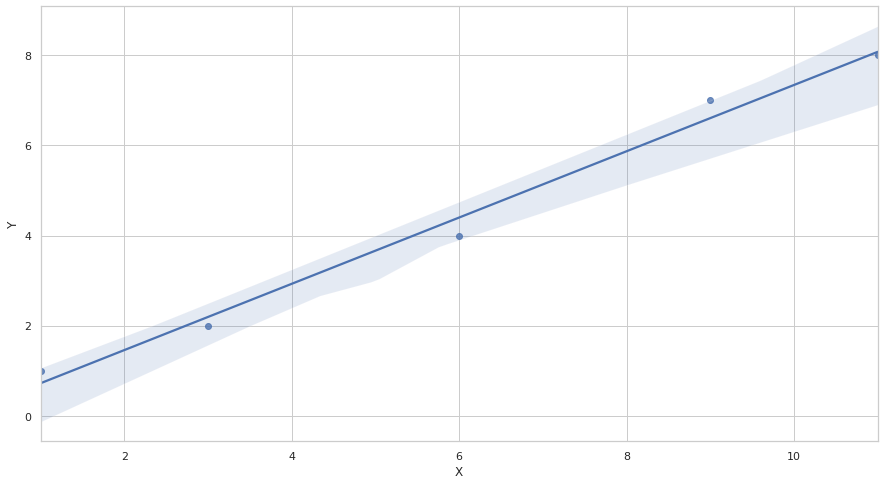

In [36]:
# Yes, the outliers would be the points where the difference is higher than 1.0, as the average is under that value.
data2 = pd.DataFrame({'X': [1,3,6,9,11], 'Y': [1,2,4,7,8]})
sns.regplot(x=data2["X"], y=data2["Y"], data=data2);

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [39]:
data2_corr = data2.corr()
print(data2_corr) # We can see that by removing the outliers the relation between X and Y is much linear than before.

          X         Y
X  1.000000  0.994132
Y  0.994132  1.000000
